In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

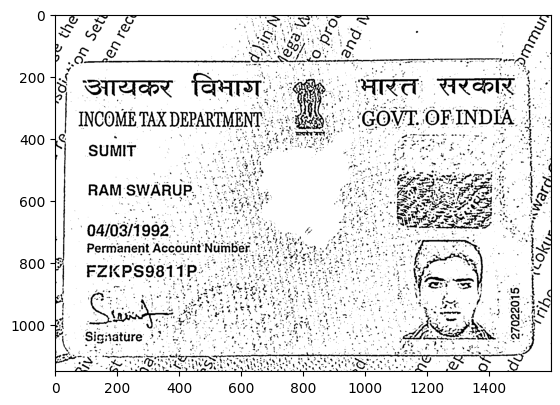

In [10]:
img_path = "data\\01_raw_data\\pan.jpeg"

img = cv2.imread(img_path)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred_img = cv2.GaussianBlur(gray_img, (7, 7), 0)

thresh = cv2.adaptiveThreshold(blurred_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

plt.imshow(thresh, cmap="gray")
plt.show()

In [11]:


# Define the structuring element
# You can adjust the kernel size as needed
kernel = np.ones((3,3), np.uint8)

# Applying morphological operations
# Erosion to remove noise
eroded_image = cv2.erode(thresh, kernel, iterations=1)

# Dilation to recover the object size
dilated_image = cv2.dilate(eroded_image, kernel, iterations=1)

# You can also use opening which is erosion followed by dilation
opened_image = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

# Save or display the images
# cv2.imwrite('/mnt/data/eroded_image.png', eroded_image)
# cv2.imwrite('/mnt/data/dilated_image.png', dilated_image)
# cv2.imwrite('/mnt/data/opened_image.png', opened_image)

# Display images (if using a GUI environment)
cv2.imshow('Eroded', eroded_image)
cv2.imshow('Dilated', dilated_image)
cv2.imshow('Opened', opened_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


contours (0, 0, 1600, 1150)
Area 1826442.0


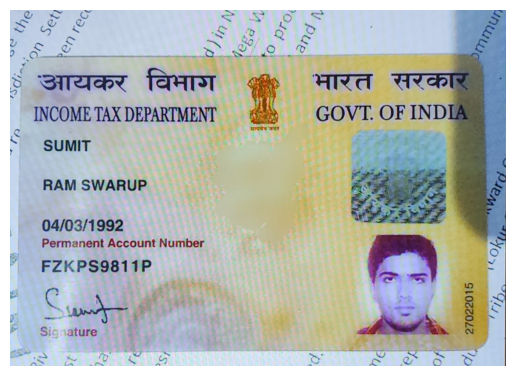

In [13]:
contours, _ = cv2.findContours(thresh, mode = cv2.RETR_EXTERNAL, method = cv2.CHAIN_APPROX_SIMPLE)

# Select the largest contour (assuming the ID card is the largest object)
largest_contour = None
largest_area = 0
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > largest_area:
        largest_contour = cnt
        largest_area = area

x, y, w, h = cv2.boundingRect(largest_contour)

print("contours", (x, y, w, h))
print("Area", largest_area)
contour_id = img[y:y+h, x:x+w]

plt.imshow(contour_id)
plt.axis('off')
plt.show()